In [1253]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np

In [1254]:
Stock_A = "SPLG"
Stock_B = "SPY"
stocks = [Stock_A,Stock_B]

In [1255]:
StockPrices = yf.download(stocks,"2024-01-01","2025-01-01",interval="1h")['Close']
StockPrices.dropna(inplace=True)


[*********************100%***********************]  2 of 2 completed


In [1256]:
StockPrices.corr()

Ticker      SPLG       SPY
Ticker                    
SPLG    1.000000  0.999965
SPY     0.999965  1.000000

In [1257]:
StockPrices['Rt']=StockPrices[Stock_A]/StockPrices[Stock_B]
StockPrices['Rt1']=StockPrices['Rt'].shift(1)
StockPrices['DeltaRt']=StockPrices['Rt']-StockPrices['Rt1']
StockPrices

Ticker                          SPLG         SPY        Rt       Rt1  \
Datetime                                                               
2024-01-02 14:30:00+00:00  55.490002  471.760010  0.117623       NaN   
2024-01-02 15:30:00+00:00  55.556599  472.329987  0.117622  0.117623   
2024-01-02 16:30:00+00:00  55.639900  472.975006  0.117638  0.117622   
2024-01-02 17:30:00+00:00  55.599998  472.660492  0.117632  0.117638   
2024-01-02 18:30:00+00:00  55.500000  471.880096  0.117615  0.117632   
...                              ...         ...       ...       ...   
2024-12-31 16:30:00+00:00  68.900002  585.888672  0.117599  0.117634   
2024-12-31 17:30:00+00:00  68.824997  585.010010  0.117648  0.117599   
2024-12-31 18:30:00+00:00  68.806702  584.940002  0.117630  0.117648   
2024-12-31 19:30:00+00:00  69.080002  587.230103  0.117637  0.117630   
2024-12-31 20:30:00+00:00  68.940002  586.010010  0.117643  0.117637   

Ticker                          DeltaRt  
Datetime                                 
2024-01-02 14:30:00+00:00           NaN  
2024-01-02 15:30:00+00:00 -9.434238e-07  
2024-01-02 16:30:00+00:00  1.571496e-05  
2024-01-02 17:30:00+00:00 -6.141559e-06  
2024-01-02 18:30:00+00:00 -1.737516e-05  
...                                 ...  
2024-12-31 16:30:00+00:00 -3.438783e-05  
2024-12-31 17:30:00+00:00  4.841853e-05  
2024-12-31 18:30:00+00:00 -1.719680e-05  
2024-12-31 19:30:00+00:00  6.666684e-06  
2024-12-31 20:30:00+00:00  6.021559e-06  

[1752 rows x 5 columns]

In [1258]:
StockPrices = StockPrices.dropna()
StockPrices

Ticker                          SPLG         SPY        Rt       Rt1  \
Datetime                                                               
2024-01-02 15:30:00+00:00  55.556599  472.329987  0.117622  0.117623   
2024-01-02 16:30:00+00:00  55.639900  472.975006  0.117638  0.117622   
2024-01-02 17:30:00+00:00  55.599998  472.660492  0.117632  0.117638   
2024-01-02 18:30:00+00:00  55.500000  471.880096  0.117615  0.117632   
2024-01-02 19:30:00+00:00  55.389999  470.910004  0.117623  0.117615   
...                              ...         ...       ...       ...   
2024-12-31 16:30:00+00:00  68.900002  585.888672  0.117599  0.117634   
2024-12-31 17:30:00+00:00  68.824997  585.010010  0.117648  0.117599   
2024-12-31 18:30:00+00:00  68.806702  584.940002  0.117630  0.117648   
2024-12-31 19:30:00+00:00  69.080002  587.230103  0.117637  0.117630   
2024-12-31 20:30:00+00:00  68.940002  586.010010  0.117643  0.117637   

Ticker                          DeltaRt  
Datetime                                 
2024-01-02 15:30:00+00:00 -9.434238e-07  
2024-01-02 16:30:00+00:00  1.571496e-05  
2024-01-02 17:30:00+00:00 -6.141559e-06  
2024-01-02 18:30:00+00:00 -1.737516e-05  
2024-01-02 19:30:00+00:00  8.699085e-06  
...                                 ...  
2024-12-31 16:30:00+00:00 -3.438783e-05  
2024-12-31 17:30:00+00:00  4.841853e-05  
2024-12-31 18:30:00+00:00 -1.719680e-05  
2024-12-31 19:30:00+00:00  6.666684e-06  
2024-12-31 20:30:00+00:00  6.021559e-06  

[1751 rows x 5 columns]

In [ ]:
model=sm.ols(data=StockPrices, formula="DeltaRt ~ Rt1").fit(cov_type='HC3') 
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                DeltaRt   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     6.355
Date:                Sat, 14 Jun 2025   Prob (F-statistic):             0.0118
Time:                        23:45:08   Log-Likelihood:                 15842.
No. Observations:                1751   AIC:                        -3.168e+04
Df Residuals:                    1749   BIC:                        -3.167e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0123      0.005      2.521      0.012       0.003       0.022
Rt1           -0.1043      0.041     -2.521      0.012      -0.185      -0.023
==============================================================================
Omnibus:                      758.895   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1107439.591
Skew:                           0.250   Prob(JB):                         0.00
Kurtosis:                     126.202   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1260]:
c=model.params[0]
c

C:\Users\Shayib\AppData\Local\Temp\ipykernel_20096\420980860.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c=model.params[0]


np.float64(0.012271848993407126)

In [1261]:
d = -model.params[1]
d

C:\Users\Shayib\AppData\Local\Temp\ipykernel_20096\86047203.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = -model.params[1]


np.float64(0.10432585013010605)

In [1262]:
NewStockPrices=yf.download(stocks,"2025-01-01","2025-06-14",interval="1h")['Close']
NewStockPrices.dropna(inplace=True)


[*********************100%***********************]  2 of 2 completed


In [1263]:
NewStockPrices['Rt']=NewStockPrices[Stock_A]/NewStockPrices[Stock_B]
NewStockPrices['Rt1']=NewStockPrices['Rt'].shift(1)
NewStockPrices['DeltaRt']=NewStockPrices['Rt']-NewStockPrices['Rt1']
NewStockPrices = NewStockPrices.dropna()
NewStockPrices

Ticker                          SPLG         SPY        Rt       Rt1  \
Datetime                                                               
2025-01-02 15:30:00+00:00  69.105003  587.530090  0.117620  0.117628   
2025-01-02 16:30:00+00:00  68.759903  584.489990  0.117641  0.117620   
2025-01-02 17:30:00+00:00  68.489998  582.359985  0.117608  0.117641   
2025-01-02 18:30:00+00:00  68.610001  583.280029  0.117628  0.117608   
2025-01-02 19:30:00+00:00  68.746101  584.469971  0.117621  0.117628   
...                              ...         ...       ...       ...   
2025-06-13 15:30:00+00:00  70.679703  600.880005  0.117627  0.117628   
2025-06-13 16:30:00+00:00  70.529999  599.530029  0.117642  0.117627   
2025-06-13 17:30:00+00:00  70.250000  597.109985  0.117650  0.117642   
2025-06-13 18:30:00+00:00  70.139999  596.269226  0.117631  0.117650   
2025-06-13 19:30:00+00:00  70.220001  596.940002  0.117633  0.117631   

Ticker                          DeltaRt  
Datetime                                 
2025-01-02 15:30:00+00:00 -8.022807e-06  
2025-01-02 16:30:00+00:00  2.134287e-05  
2025-01-02 17:30:00+00:00 -3.319166e-05  
2025-01-02 18:30:00+00:00  2.022789e-05  
2025-01-02 19:30:00+00:00 -6.620581e-06  
...                                 ...  
2025-06-13 15:30:00+00:00 -9.666383e-07  
2025-06-13 16:30:00+00:00  1.516117e-05  
2025-06-13 17:30:00+00:00  7.871886e-06  
2025-06-13 18:30:00+00:00 -1.859104e-05  
2025-06-13 19:30:00+00:00  1.838460e-06  

[783 rows x 5 columns]

In [1264]:
threshold = c / d
NewStockPrices['A_Position'] = 0
NewStockPrices['B_Position'] = 0
NewStockPrices['Portfolio_Value']=0
NewStockPrices['Delta_A_Position'] = 0
NewStockPrices['Delta_B_Position'] = 0
NewStockPrices['Cash_Position'] = 0
NewStockPrices['Cash_Flow'] = 0
NewStockPrices['Cumulative_Number_of_transaction'] = 0
threshold

np.float64(0.11762999274008074)

In [ ]:
for i in range(1, len(NewStockPrices)):
    Rt = NewStockPrices['Rt'].iloc[i]

    if Rt > threshold and NewStockPrices['A_Position'].iloc[i-1]>=0:
        NewStockPrices['A_Position'].iloc[i] = -100/NewStockPrices[Stock_A].iloc[i]
        NewStockPrices['B_Position'].iloc[i] = 100/NewStockPrices[Stock_B].iloc[i]
    elif Rt < threshold and NewStockPrices['A_Position'].iloc[i-1]<=0:  
        NewStockPrices['A_Position'].iloc[i] = 100/NewStockPrices[Stock_A].iloc[i]
        NewStockPrices['B_Position'].iloc[i] = -100/NewStockPrices[Stock_B].iloc[i]
    else:
        NewStockPrices['A_Position'].iloc[i] = NewStockPrices['A_Position'].iloc[i-1]  # Hold position
        NewStockPrices['B_Position'].iloc[i] = NewStockPrices['B_Position'].iloc[i-1]  
    

    NewStockPrices['Delta_A_Position'].iloc[i] = NewStockPrices['A_Position'].iloc[i] - NewStockPrices['A_Position'].iloc[i-1]
    NewStockPrices['Delta_B_Position'].iloc[i] = NewStockPrices['B_Position'].iloc[i] - NewStockPrices['B_Position'].iloc[i-1]
    

    if NewStockPrices['A_Position'].iloc[i] != NewStockPrices['A_Position'].iloc[i-1]:
        NewStockPrices['Cash_Position'].iloc[i] = (NewStockPrices['Delta_A_Position'].iloc[i] * -NewStockPrices[Stock_A].iloc[i]) + (NewStockPrices['Delta_B_Position'].iloc[i] * -NewStockPrices[Stock_B].iloc[i]) + NewStockPrices['Cash_Position'].iloc[i-1]
    else:
        NewStockPrices['Cash_Position'].iloc[i] = NewStockPrices['Cash_Position'].iloc[i-1]
                             

    NewStockPrices['Portfolio_Value'].iloc[i] = (NewStockPrices['A_Position'].iloc[i] * NewStockPrices[Stock_A].iloc[i]) + (NewStockPrices['B_Position'].iloc[i] * NewStockPrices[Stock_B].iloc[i]) + NewStockPrices['Cash_Position'].iloc[i] 
    
    NewStockPrices['Cash_Flow'].iloc[i] = NewStockPrices['Cash_Position'].iloc[i] - NewStockPrices['Cash_Position'].iloc[i-1]

    if NewStockPrices['Cash_Flow'].iloc[i] !=0:
        NewStockPrices['Cumulative_Number_of_transaction'].iloc[i] = NewStockPrices['Cumulative_Number_of_transaction'].iloc[i-1] + 1
    else:
        NewStockPrices['Cumulative_Number_of_transaction'].iloc[i] = NewStockPrices['Cumulative_Number_of_transaction'].iloc[i-1]
                                              


C:\Users\Shayib\AppData\Local\Temp\ipykernel_20096\515839010.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  NewStockPrices['A_Position'].iloc[i] = -100/NewStockPrices[Stock_A].iloc[i]
C:\Users\Shayib\AppData\Local\Temp\ipykernel_20096\5

In [1266]:
NewStockPrices

Ticker                          SPLG         SPY        Rt       Rt1  \
Datetime                                                               
2025-01-02 15:30:00+00:00  69.105003  587.530090  0.117620  0.117628   
2025-01-02 16:30:00+00:00  68.759903  584.489990  0.117641  0.117620   
2025-01-02 17:30:00+00:00  68.489998  582.359985  0.117608  0.117641   
2025-01-02 18:30:00+00:00  68.610001  583.280029  0.117628  0.117608   
2025-01-02 19:30:00+00:00  68.746101  584.469971  0.117621  0.117628   
...                              ...         ...       ...       ...   
2025-06-13 15:30:00+00:00  70.679703  600.880005  0.117627  0.117628   
2025-06-13 16:30:00+00:00  70.529999  599.530029  0.117642  0.117627   
2025-06-13 17:30:00+00:00  70.250000  597.109985  0.117650  0.117642   
2025-06-13 18:30:00+00:00  70.139999  596.269226  0.117631  0.117650   
2025-06-13 19:30:00+00:00  70.220001  596.940002  0.117633  0.117631   

Ticker                          DeltaRt  A_Position  B_Position  \
Datetime                                                          
2025-01-02 15:30:00+00:00 -8.022807e-06    0.000000    0.000000   
2025-01-02 16:30:00+00:00  2.134287e-05   -1.454336    0.171089   
2025-01-02 17:30:00+00:00 -3.319166e-05    1.460067   -0.171715   
2025-01-02 18:30:00+00:00  2.022789e-05    1.460067   -0.171715   
2025-01-02 19:30:00+00:00 -6.620581e-06    1.460067   -0.171715   
...                                 ...         ...         ...   
2025-06-13 15:30:00+00:00 -9.666383e-07    1.415528   -0.166506   
2025-06-13 16:30:00+00:00  1.516117e-05   -1.417836    0.166797   
2025-06-13 17:30:00+00:00  7.871886e-06   -1.417836    0.166797   
2025-06-13 18:30:00+00:00 -1.859104e-05   -1.417836    0.166797   
2025-06-13 19:30:00+00:00  1.838460e-06   -1.417836    0.166797   

Ticker                     Portfolio_Value  Delta_A_Position  \
Datetime                                                       
2025-01-02 15:30:00+00:00         0.000000          0.000000   
2025-01-02 16:30:00+00:00         0.000000         -1.454336   
2025-01-02 17:30:00+00:00         0.028112          2.914403   
2025-01-02 18:30:00+00:00         0.045338          0.000000   
2025-01-02 19:30:00+00:00         0.039724          0.000000   
...                                    ...               ...   
2025-06-13 15:30:00+00:00         3.939318          0.000000   
2025-06-13 16:30:00+00:00         3.952186         -2.833365   
2025-06-13 17:30:00+00:00         3.945522          0.000000   
2025-06-13 18:30:00+00:00         3.961248          0.000000   
2025-06-13 19:30:00+00:00         3.959702          0.000000   

Ticker                     Delta_B_Position  Cash_Position  Cash_Flow  \
Datetime                                                                
2025-01-02 15:30:00+00:00          0.000000       0.000000   0.000000   
2025-01-02 16:30:00+00:00          0.171089       0.000000   0.000000   
2025-01-02 17:30:00+00:00         -0.342804       0.028112   0.028112   
2025-01-02 18:30:00+00:00          0.000000       0.028112   0.000000   
2025-01-02 19:30:00+00:00          0.000000       0.028112   0.000000   
...                                     ...            ...        ...   
2025-06-13 15:30:00+00:00          0.000000       3.940140   0.000000   
2025-06-13 16:30:00+00:00          0.333303       3.952186   0.012046   
2025-06-13 17:30:00+00:00          0.000000       3.952186   0.000000   
2025-06-13 18:30:00+00:00          0.000000       3.952186   0.000000   
2025-06-13 19:30:00+00:00          0.000000       3.952186   0.000000   

Ticker                     Cumulative_Number_of_transaction  
Datetime                                                     
2025-01-02 15:30:00+00:00                                 0  
2025-01-02 16:30:00+00:00                                 0  
2025-01-02 17:30:00+00:00                                 1  
2025-01-02 18:30:00+00:00                                 1  
2025-01-02 19:30:00+00:00           

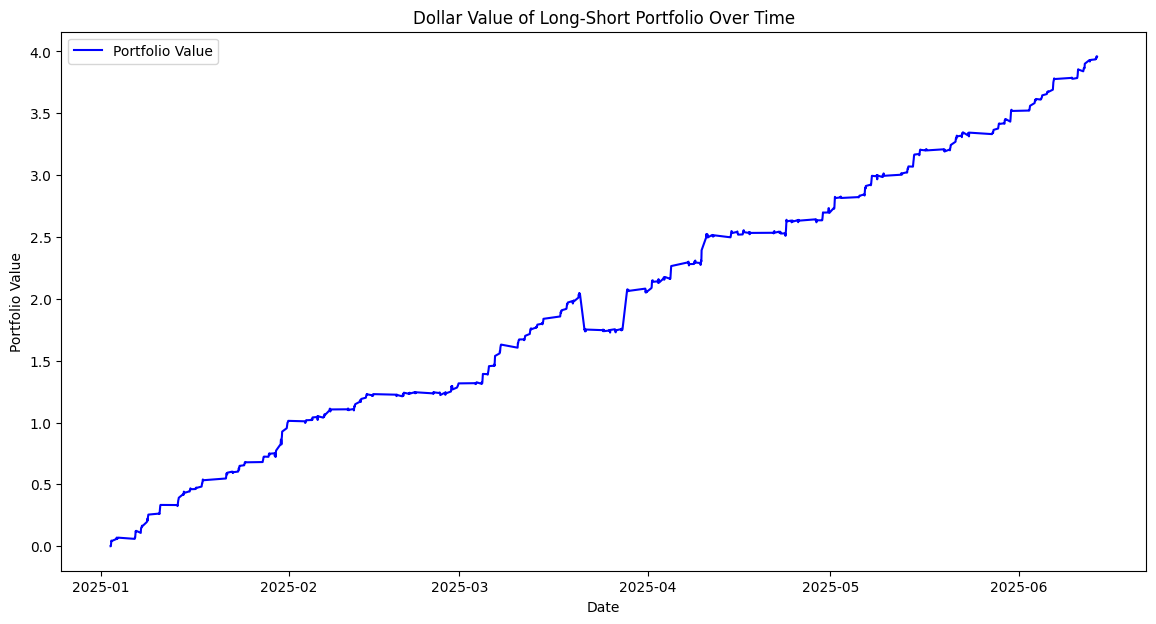

In [1267]:
plt.figure(figsize=(14, 7))
plt.plot(NewStockPrices.index, NewStockPrices['Portfolio_Value'], label='Portfolio Value', color='blue')
plt.title('Dollar Value of Long-Short Portfolio Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(False)
plt.show()

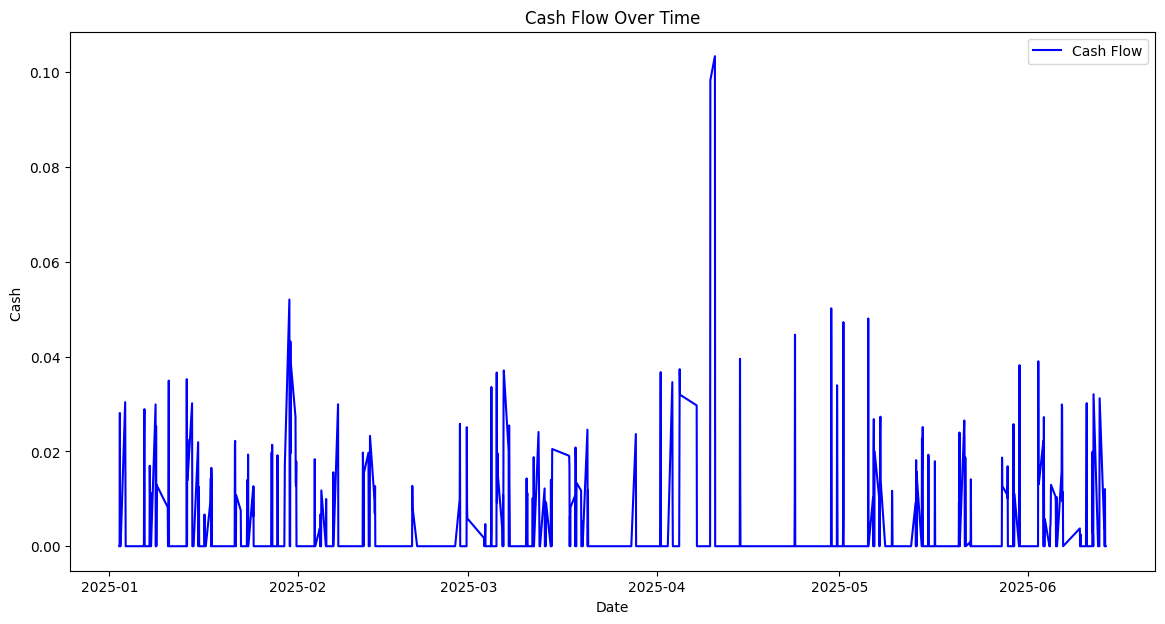

In [1268]:
plt.figure(figsize=(14, 7))
plt.plot(NewStockPrices.index, NewStockPrices['Cash_Flow'], label='Cash Flow', color='blue')
plt.title('Cash Flow Over Time')
plt.xlabel('Date')
plt.ylabel('Cash ')
plt.legend()
plt.grid(False)
plt.show()

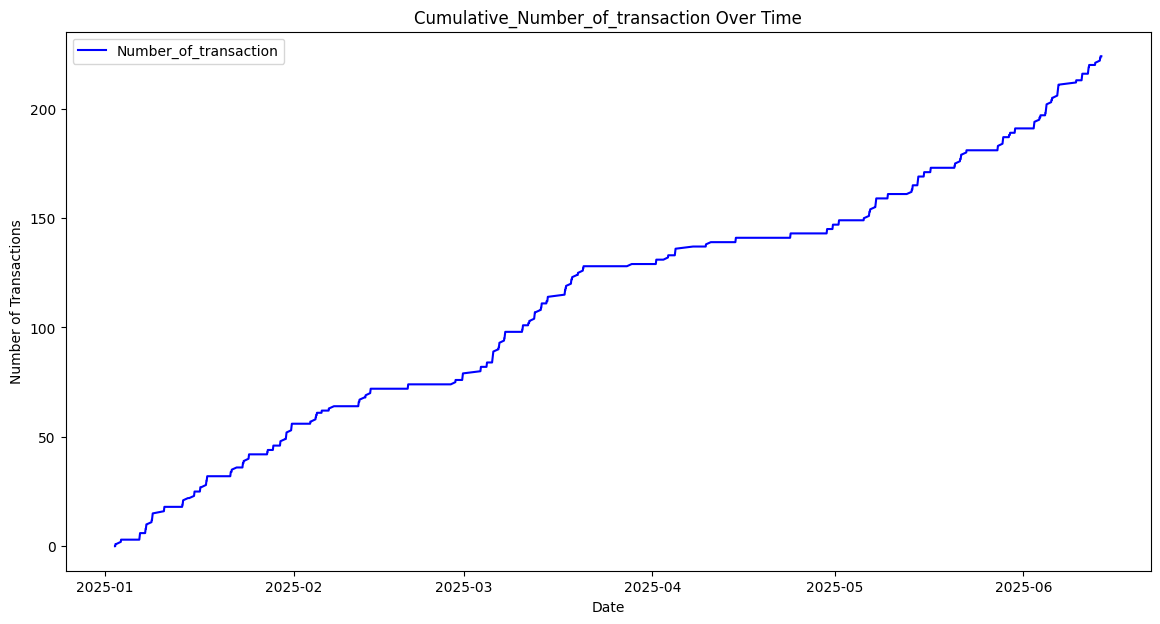

In [1269]:
plt.figure(figsize=(14, 7))
plt.plot(NewStockPrices.index, NewStockPrices['Cumulative_Number_of_transaction'], label='Number_of_transaction', color='blue')
plt.title('Cumulative_Number_of_transaction Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(False)

In [1270]:
returns = NewStockPrices['Portfolio_Value']/NewStockPrices['Portfolio_Value'].shift(1)-1
returns.replace([np.inf, -np.inf],np.nan,inplace=True)
mu = returns.mean()*252
s = returns.std()*252**0.5
mu/s

np.float64(2.829484706473489)

In [1271]:
returns

Datetime
2025-01-02 15:30:00+00:00         NaN
2025-01-02 16:30:00+00:00         NaN
2025-01-02 17:30:00+00:00         NaN
2025-01-02 18:30:00+00:00    0.612795
2025-01-02 19:30:00+00:00   -0.123839
                               ...   
2025-06-13 15:30:00+00:00   -0.000209
2025-06-13 16:30:00+00:00    0.003267
2025-06-13 17:30:00+00:00   -0.001686
2025-06-13 18:30:00+00:00    0.003986
2025-06-13 19:30:00+00:00   -0.000390
Name: Portfolio_Value, Length: 783, dtype: float64